<a href="https://colab.research.google.com/github/sidd-2203/Intrusion-Detection/blob/main/Intrusion_Detection_on_Network_Logs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intrusion Detection System based on Network Logs

*   These network logs are from NSL-KDD dataset which is widely used for intrusion detection.



In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
train_file_path='https://raw.githubusercontent.com/sidd-2203/Intrusion-Detection/main/csv_result-KDDTrain%2B.csv'
test_file_path='https://raw.githubusercontent.com/sidd-2203/Intrusion-Detection/main/KDDTest.csv'

In [3]:
train_df=pd.read_csv(train_file_path)
train_df=train_df.drop(['id'],axis=1)
test_df=pd.read_csv(test_file_path,header=None,names=train_df.columns)
print('Dimensions of the Training set:',train_df.shape)
print('Dimensions of the Test set:',test_df.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [4]:
train_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [5]:
test_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,anomaly
5,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,anomaly
8,0,tcp,http,SF,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,anomaly


In [5]:
for col_name in train_df.columns:
  if train_df[col_name].dtypes=="object":
    unique_cat=len(train_df[col_name].unique())
    print("{col_names} has following distinct values {values} -> {len}\n".format(col_names=col_name,values=train_df[col_name].unique(),len=unique_cat))

protocol_type has following distinct values ['tcp' 'udp' 'icmp'] -> 3

service has following distinct values ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest'] -> 70

flag has following distinct values ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] -> 11

class has following distinct values ['normal' 'anomaly'] -> 2



In [6]:
for col_name in test_df.columns:
  if test_df[col_name].dtypes=="object":
    unique_cat=len(test_df[col_name].unique())
    print("{col_names} has following distinct values {values} -> {len}\n".format(col_names=col_name,values=test_df[col_name].unique(),len=unique_cat))

protocol_type has following distinct values ['tcp' 'icmp' 'udp'] -> 3

service has following distinct values ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u'] -> 64

flag has following distinct values ['REJ' 'SF' 'RSTO' 'S0' 'RSTR' 'SH' 'S3' 'S2' 'S1' 'RSTOS0' 'OTH'] -> 11

class has following distinct values ['anomaly' 'normal'] -> 2



Now we can see that in the service column in train dataset we have 70 types and in the test dataset we have only 64 columns so will have to remove rest 6 types,
but will do it just before prediction so that if we test our model on some different test data which has those 6 columns we can handle that.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
px.histogram(train_df,
              x='protocol_type',
            title='count of protocol_type',
             color='class')

In [11]:
px.histogram(train_df,
            x='service',
            title='count of Sevice',
             color='class')

In [9]:
for col_name in train_df.columns:
  print(col_name ,' ->',len(train_df[col_name].unique()))

duration  -> 2981
protocol_type  -> 3
service  -> 70
flag  -> 11
src_bytes  -> 3341
dst_bytes  -> 9326
land  -> 2
wrong_fragment  -> 3
urgent  -> 4
hot  -> 28
num_failed_logins  -> 6
logged_in  -> 2
num_compromised  -> 88
root_shell  -> 2
su_attempted  -> 3
num_root  -> 82
num_file_creations  -> 35
num_shells  -> 3
num_access_files  -> 10
num_outbound_cmds  -> 1
is_host_login  -> 2
is_guest_login  -> 2
count  -> 512
srv_count  -> 509
serror_rate  -> 89
srv_serror_rate  -> 86
rerror_rate  -> 82
srv_rerror_rate  -> 62
same_srv_rate  -> 101
diff_srv_rate  -> 95
srv_diff_host_rate  -> 60
dst_host_count  -> 256
dst_host_srv_count  -> 256
dst_host_same_srv_rate  -> 101
dst_host_diff_srv_rate  -> 101
dst_host_same_src_port_rate  -> 101
dst_host_srv_diff_host_rate  -> 75
dst_host_serror_rate  -> 101
dst_host_srv_serror_rate  -> 100
dst_host_rerror_rate  -> 101
dst_host_srv_rerror_rate  -> 101
class  -> 2


In [13]:
px.histogram(train_df,
            x='num_failed_logins',
            title='count of Failed Logins',
             color='class')

In [14]:
px.histogram(train_df,
            x='hot',
            title='count of hot',
             color='class')

In [15]:
px.histogram(train_df,
            x='num_access_files',
            title='count of Number of files accessed',
             color='class')

We can see that out of the soo many features we tried to plot not a single one can show us a direct relation of the feature and anamoly means our data is distributed very nicely.


One Hot Encoding using dummy


In [10]:
train_df['class'].replace({'normal':0,'anomaly':1},inplace=True)
test_df['class'].replace({'normal':0,'anomaly':1},inplace=True)

In [11]:
train_df.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
32403,0,tcp,private,S0,0,0,0,0,0,0,...,19,0.07,0.05,0.00,0.00,1.0,1.0,0.00,0.00,1
168,0,tcp,ftp_data,SF,245,0,0,0,0,0,...,68,0.32,0.06,0.32,0.03,0.0,0.0,0.00,0.00,0
76909,0,tcp,http,SF,321,6310,0,0,0,0,...,230,1.00,0.00,0.20,0.03,0.0,0.0,0.00,0.00,0
113310,0,tcp,http,SF,240,1471,0,0,0,0,...,196,1.00,0.00,0.02,0.02,0.0,0.0,0.00,0.00,0
107034,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,231,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,1
68397,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.06,0.00,0.00,1.0,1.0,0.00,0.00,1
85349,0,tcp,http,SF,281,794,0,0,0,0,...,255,1.00,0.00,0.25,0.03,0.0,0.0,0.00,0.00,0
78561,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.54,0.00,0.00,0.0,0.0,0.49,1.00,1
92151,1,tcp,http,SF,54540,8314,0,0,0,2,...,96,1.00,0.00,0.01,0.00,0.0,0.0,0.01,0.01,1
33231,0,udp,domain_u,SF,44,133,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.00,0.00,0


In [12]:
object_cols=[]
for col in train_df:
  if( train_df[col].dtypes=='object'):
    object_cols.append(col)
  print(f'{col}: {train_df[col].unique()}')

duration: [    0  5607   507 ...  5430 11680   679]
protocol_type: ['tcp' 'udp' 'icmp']
service: ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
flag: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
src_bytes: [  491   146     0 ...  2816 11466  2358]
dst_bytes: [    0  8153   420 ...  5424 17655 52866]
land: [0 1]
wrong_fragment: [0 3 1]
urgent: [0 1 3 2]
hot: [ 0  5  6  4  2  1 28 30 22 24 14  3 15 25 19

In [13]:
object_cols

['protocol_type', 'service', 'flag']

One hot encoding

In [14]:
train_df2=pd.get_dummies(train_df,columns=object_cols)
train_df2.sample(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
45424,0,920,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
115824,0,295,5392,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
81122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26222,0,348,7223,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111963,0,28,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63439,0,232,674,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
42820,0,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35728,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16008,0,54060,7300,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
test_df2=pd.get_dummies(test_df,columns=object_cols)
test_df2.sample(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
21145,0,105,147,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6821,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19922,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7540,0,44,44,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
163,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2049,0,226,916,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
155,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5837,0,289,1484,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
13225,0,230,7679,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2091,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
Y_df=train_df2['class']
X_df=train_df2.drop(['class'],axis=1)

In [17]:
Y_test_df=test_df2['class']
X_test_df=test_df2.drop(['class'],axis=1)

In [18]:
test_cols=X_test_df.columns
[x for x in X_df.columns if x not in test_cols]

['service_aol',
 'service_harvest',
 'service_http_2784',
 'service_http_8001',
 'service_red_i',
 'service_urh_i']

In [19]:
remove=True
if remove:
  test_cols=X_test_df.columns
  X_df=X_df.drop([x for x in X_df.columns if x not in test_cols],axis=1)

In [20]:
print(len(X_df.columns),len(X_test_df.columns))

116 116


In [21]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_df)
X_df=scaler.transform(X_df)
print(X_df.shape)

(125973, 116)


In [22]:
scaler = preprocessing.StandardScaler().fit(X_test_df)
X_test_df=scaler.transform(X_test_df)
print(X_test_df.shape)

(22544, 116)


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [31]:
svm_model=SVC(kernel='linear',C=1.0,random_state=42 )
svm_model.fit(X_df,Y_df)

SVC(kernel='linear', random_state=42)

In [46]:
y_predicted=svm_model.predict(X_test_df)

In [54]:
# Calculate accuracy, precision, and recall
class_labels=['Normal','Anomaly']
accuracy = accuracy_score(Y_test_df, y_predicted)
precision = precision_score(Y_test_df, y_predicted)
recall = recall_score(Y_test_df, y_predicted)
conf_matrix = confusion_matrix(Y_test_df,y_predicted)

In [55]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f'Confusion Matrix')
print(conf_matrix)

Accuracy: 0.7819
Precision: 0.8935
Recall: 0.7003
Confusion Matrix
[[8640 1071]
 [3846 8987]]


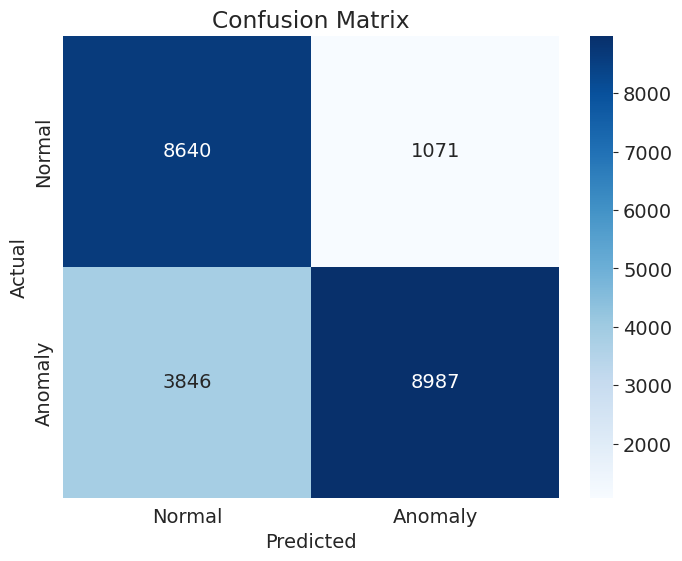

In [56]:
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot the confusion matrix with seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Lets try with different kernal functions



*   rbf




In [58]:
svm_model=SVC(kernel='rbf',C=1.0,random_state=42 )
svm_model.fit(X_df,Y_df)

SVC(random_state=42)

In [59]:
y_predicted=svm_model.predict(X_test_df)

In [60]:
class_labels=['Normal','Anomaly']
accuracy = accuracy_score(Y_test_df, y_predicted)
precision = precision_score(Y_test_df, y_predicted)
recall = recall_score(Y_test_df, y_predicted)
conf_matrix = confusion_matrix(Y_test_df,y_predicted)

In [61]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8175
Precision: 0.9201
Recall: 0.7439


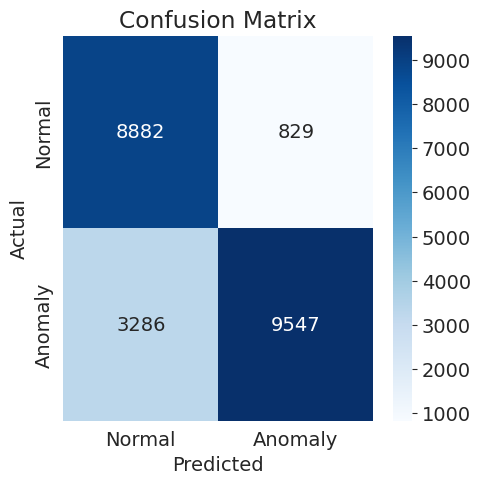

In [62]:
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot the confusion matrix with seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



*  Poly


In [24]:
svm_model=SVC(kernel='poly',C=1.0,random_state=42 )
svm_model.fit(X_df,Y_df)

SVC(kernel='poly', random_state=42)

In [25]:
y_predicted=svm_model.predict(X_test_df)

Accuracy: 0.7693
Precision: 0.9203
Recall: 0.6511


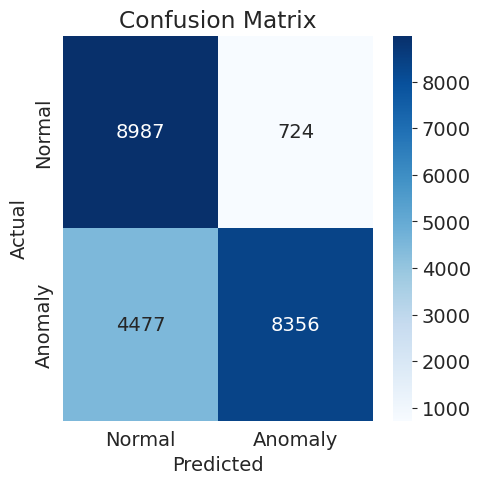

In [26]:
class_labels=['Normal','Anomaly']
accuracy = accuracy_score(Y_test_df, y_predicted)
precision = precision_score(Y_test_df, y_predicted)
recall = recall_score(Y_test_df, y_predicted)
conf_matrix = confusion_matrix(Y_test_df,y_predicted)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot the confusion matrix with seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* sigmoid


In [27]:
svm_model=SVC(kernel='sigmoid',C=1.0,random_state=42 )
svm_model.fit(X_df,Y_df)

SVC(kernel='sigmoid', random_state=42)

In [28]:
y_predicted=svm_model.predict(X_test_df)

Accuracy: 0.7852
Precision: 0.9114
Recall: 0.6898


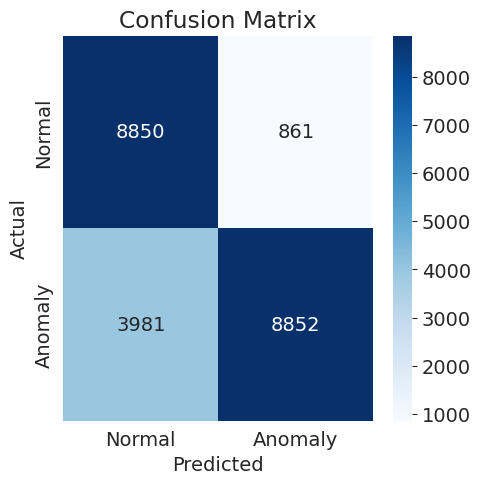

In [29]:
class_labels=['Normal','Anomaly']
accuracy = accuracy_score(Y_test_df, y_predicted)
precision = precision_score(Y_test_df, y_predicted)
recall = recall_score(Y_test_df, y_predicted)
conf_matrix = confusion_matrix(Y_test_df,y_predicted)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot the confusion matrix with seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()